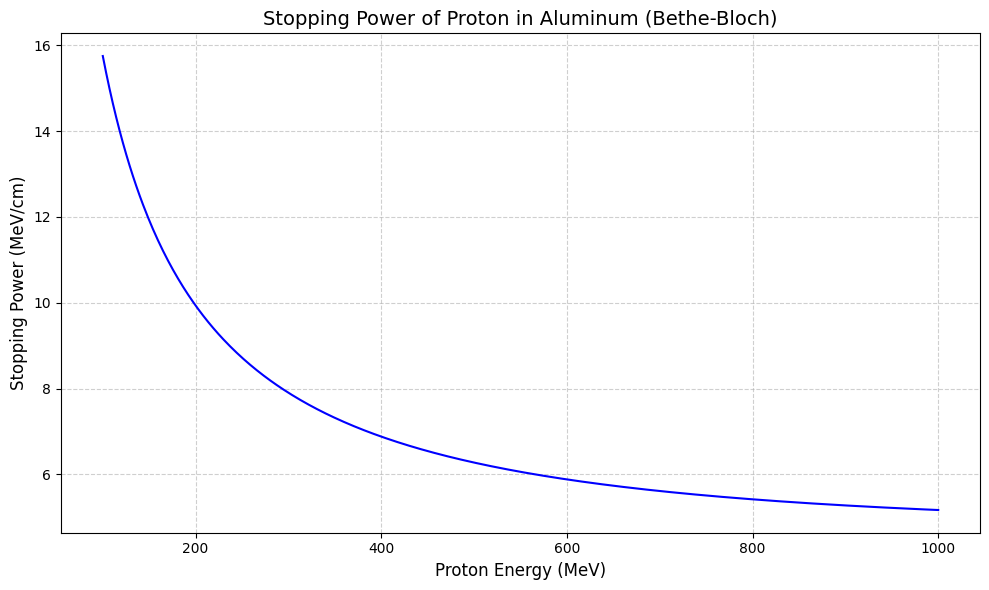

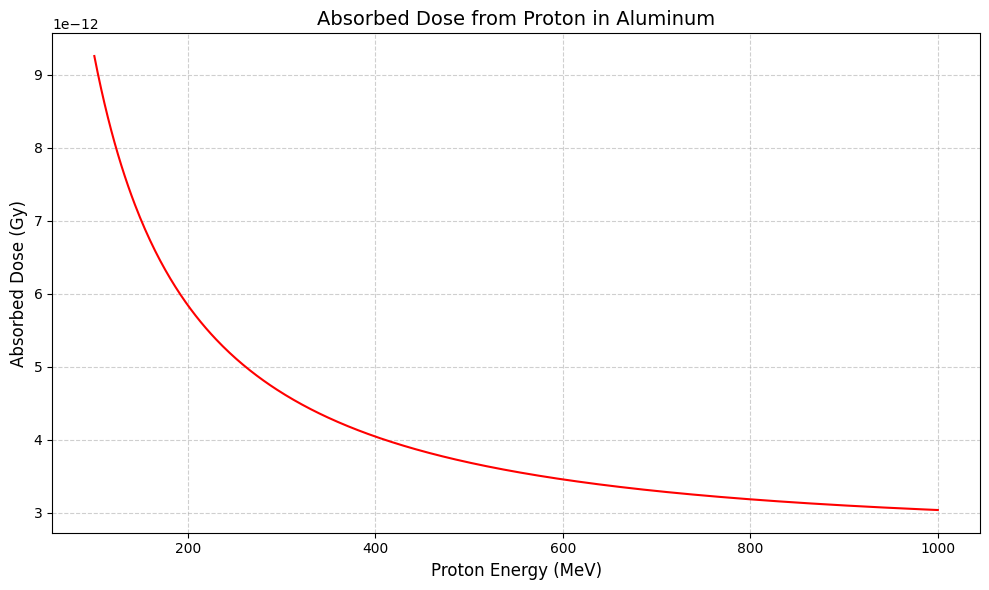

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math

# ---------------------------
# Constants
# ---------------------------
k = 0.307             # MeV·cm²/mol (proportionality constant)
me = 0.511            # MeV (electron rest mass)
mp = 938.27           # MeV (proton mass)
rho = 2.7             # g/cm³ (density of Aluminum)

# Material properties (Aluminum)
zp = 1                # Charge of incident proton
zm = 13               # Atomic number of Aluminum
am = 26.98            # Atomic mass of Aluminum
i = 166e-6            # Mean excitation energy in MeV (166 eV)

# ---------------------------
# Helper Functions
# ---------------------------

def gammacal(e):
    """Calculate gamma factor for given energy (MeV)"""
    return 1 + e / mp

def betacal(gamma):
    """Calculate beta from gamma"""
    return math.sqrt(1 - 1 / gamma**2)

def bethe_bloch(z_particle, beta, z_material, A_material, i):
    """Bethe-Bloch formula to calculate energy loss per unit length (dE/dx)"""
    gamma = 1 / math.sqrt(1 - beta**2)
    arg = (2 * me * beta**2 * gamma**2) / i
    term = math.log(arg)
    dedx = k * (z_particle**2 / beta**2) * (z_material / A_material) * term
    return dedx  # MeV/cm

def calDose(stoppP, area=100):
    """
    Convert stopping power to absorbed dose (Gy).
    - stoppP: Stopping power (MeV/cm)
    - area: Area in cm² (default = 100)
    """
    total_energy_J = stoppP * 1.60218e-13 * 5.5   # Convert MeV to Joules, multiply by path length (cm)
    volume_cm3 = area * (15 / rho)               # Volume = area * depth (15 g/cm² converted)
    mass_kg = (volume_cm3 * rho) / 1000          # Convert to kg
    dose_Gy = total_energy_J / mass_kg           # Dose in Gray (Gy = J/kg)
    return dose_Gy

# ---------------------------
# Main Calculation
# ---------------------------

energies = np.linspace(100, 1000, 500)  # Proton energies (MeV)
stopping_p = []                         # Stopping power list
dose_vals = []                          # Dose list

for e in energies:
    gamma = gammacal(e)
    beta = betacal(gamma)
    dedx = bethe_bloch(zp, beta, zm, am, i)
    stopping_power = dedx * rho              # Convert to MeV/cm
    stopping_p.append(stopping_power)

    dose_val = calDose(stopping_power)
    dose_vals.append(dose_val)

# ---------------------------
# Plotting: Stopping Power
# ---------------------------
plt.figure(figsize=(10, 6))
plt.plot(energies, stopping_p, color='blue')
plt.title('Stopping Power of Proton in Aluminum (Bethe-Bloch)', fontsize=14)
plt.xlabel('Proton Energy (MeV)', fontsize=12)
plt.ylabel('Stopping Power (MeV/cm)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# ---------------------------
# Plotting: Dose
# ---------------------------
plt.figure(figsize=(10, 6))
plt.plot(energies, dose_vals, color='red')
plt.title('Absorbed Dose from Proton in Aluminum', fontsize=14)
plt.xlabel('Proton Energy (MeV)', fontsize=12)
plt.ylabel('Absorbed Dose (Gy)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


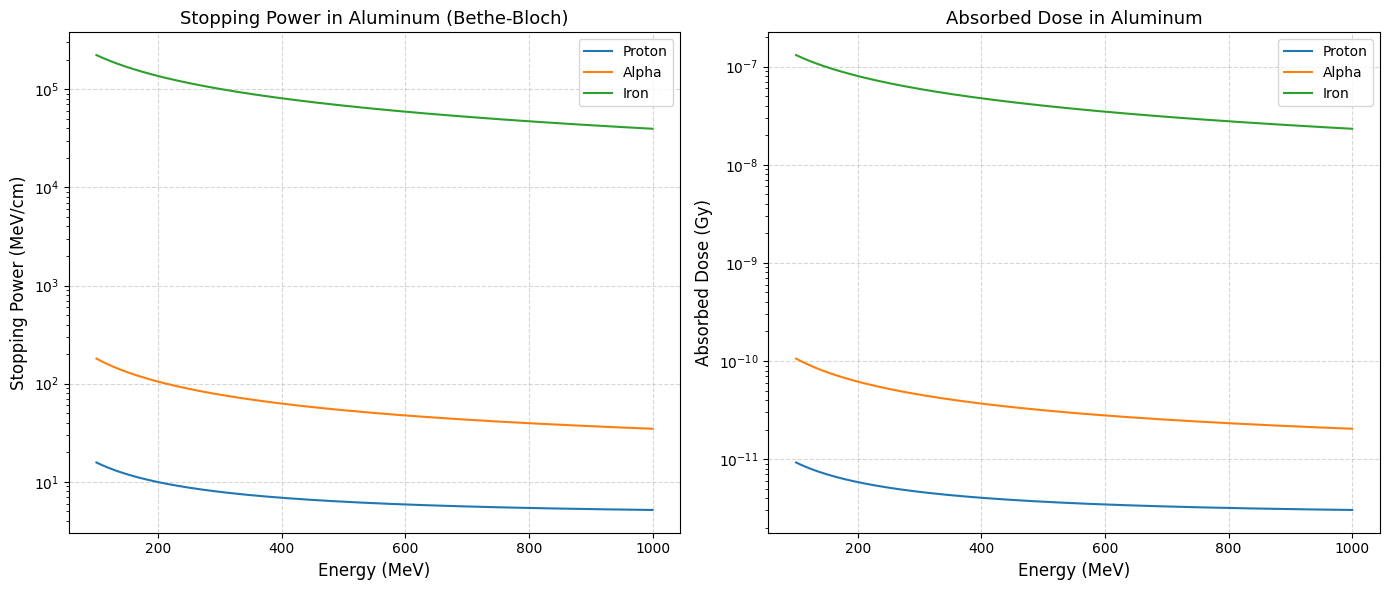

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Constants
k = 0.307  # MeV·cm²/mol
me = 0.511  # MeV (electron rest mass)
rho = 2.7  # g/cm³ (Aluminum density)

# Aluminum properties
zm = 13
am = 26.98
i = 166e-6  # Mean excitation potential in MeV (166 eV)

# Particle dictionary: name → charge, mass
particles = {
    "Proton": {"z": 1, "mass": 938.27},
    "Alpha": {"z": 2, "mass": 3727.38},
    "Iron": {"z": 26, "mass": 52000}
}

# Energy range (MeV)
energies = np.linspace(100, 1000, 500)

# Functions
def gammacal(e, m):
    return 1 + e / m

def betacal(gamma):
    return math.sqrt(1 - 1 / gamma**2)

def bethe_bloch(z_particle, beta, z_material, A_material, i):
    gamma = 1 / math.sqrt(1 - beta**2)
    arg = (2 * me * beta**2 * gamma**2) / i
    term = math.log(arg)
    dedx = k * (z_particle**2 / beta**2) * (z_material / A_material) * term
    return dedx  # MeV/cm

def calDose(stoppP, area=100):
    total_energy_J = stoppP * 1.60218e-13 * 5.5  # path length = 5.5 cm
    volume_cm3 = area * (15 / rho)
    mass_kg = (volume_cm3 * rho) / 1000
    dose = total_energy_J / mass_kg  # Dose = J/kg = Gy
    return dose

# -------------------------------
# Plotting for all particles
# -------------------------------
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

for name, par in particles.items():
    zp = par['z']
    mp = par['mass']
    stopping_p = []
    dose = []

    for e in energies:
        gamma = gammacal(e, mp)
        beta = betacal(gamma)
        dedx_p = bethe_bloch(zp, beta, zm, am, i)
        sp = dedx_p * rho
        stopping_p.append(sp)
        dose.append(calDose(sp))

    # Plot stopping power
    ax[0].plot(energies, stopping_p, label=name)
    # Plot dose
    ax[1].plot(energies, dose, label=name)

# Stopping Power Plot
ax[0].set_title("Stopping Power in Aluminum (Bethe-Bloch)", fontsize=13)
ax[0].set_xlabel("Energy (MeV)", fontsize=12)
ax[0].set_ylabel("Stopping Power (MeV/cm)", fontsize=12)
ax[0].set_yscale("log")
ax[0].grid(True, linestyle='--', alpha=0.5)
ax[0].legend()

# Dose Plot
ax[1].set_title("Absorbed Dose in Aluminum", fontsize=13)
ax[1].set_xlabel("Energy (MeV)", fontsize=12)
ax[1].set_ylabel("Absorbed Dose (Gy)", fontsize=12)
ax[1].set_yscale("log")
ax[1].grid(True, linestyle='--', alpha=0.5)
ax[1].legend()

plt.tight_layout()
plt.show()
